In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Imports the utility function to load fields
import ANL_access as anl

## Define the variables to access the data and plot it

In [2]:
# Can be in the form of a string with the format '{year} {month} {day} {hour}' or 
#   a datetime.datetime object with year, month, day, and hour
date = '2016-05-01 00:00:00'
field = 'temperature_2m'
field_name = 'Temperature at 2m AGL'
field_units = 'K'
colormap = 'turbo'

## Example: Plotting data using imshow

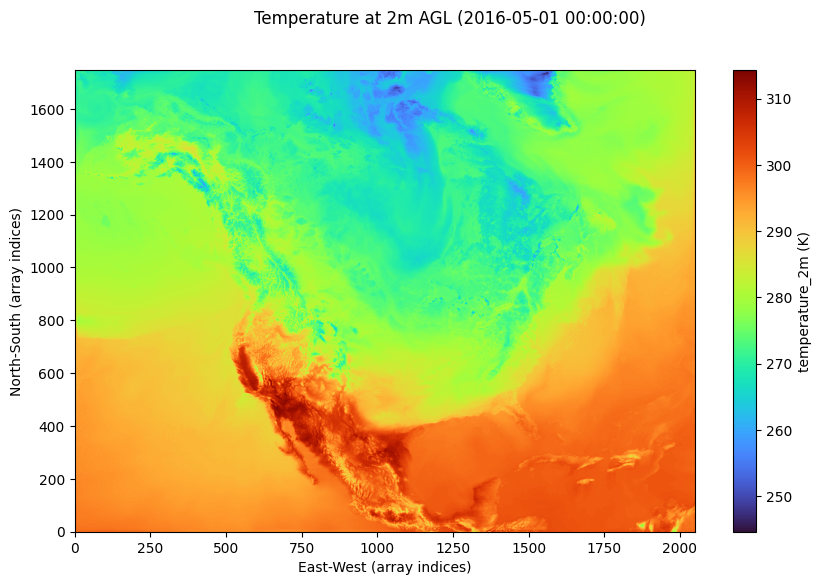

CPU times: user 903 ms, sys: 123 ms, total: 1.03 s
Wall time: 696 ms


In [3]:
%%time

title = f'{field_name} ({date})'
data = anl.get_field(date, field)

fig = plt.figure(figsize=(10, 6))
axes = plt.axes()
plot = axes.imshow(data, aspect='auto', origin='lower', cmap=colormap)
axes.set_xlabel('East-West (array indices)')
axes.set_ylabel('North-South (array indices)')
fig.suptitle(title)
fig.colorbar(plot, location='right', pad=0.05, label=f'{field} ({field_units})')

plt.show()

## Example: Plotting data with different qualities

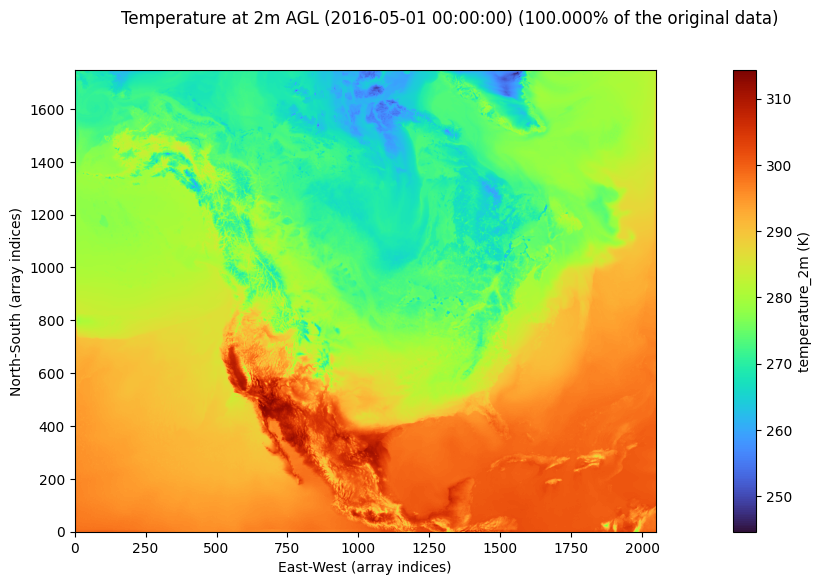

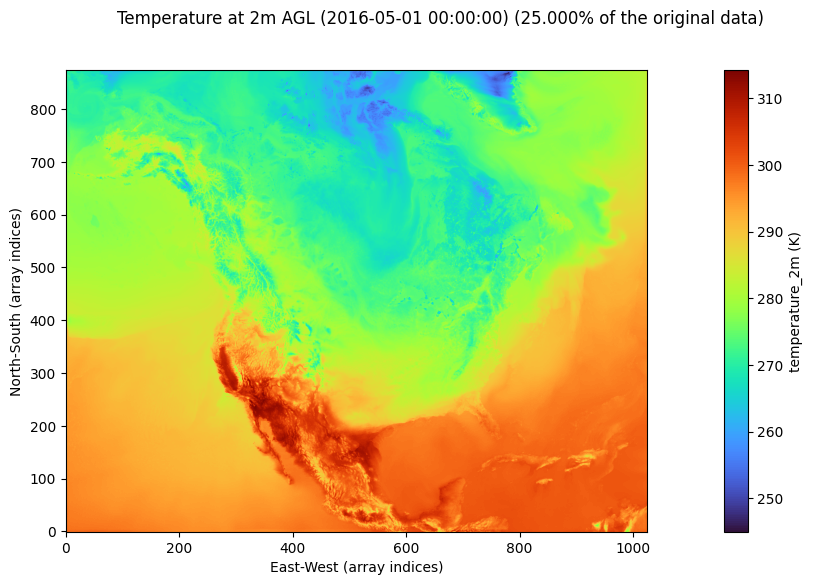

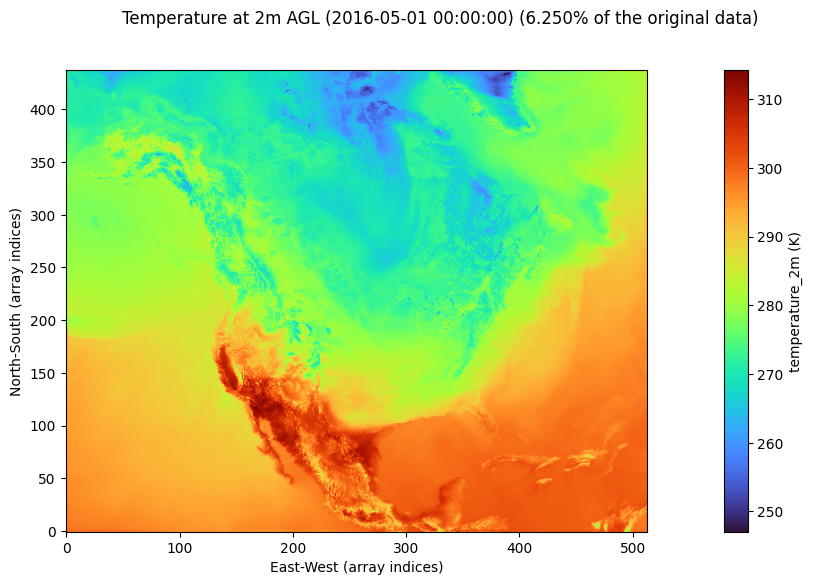

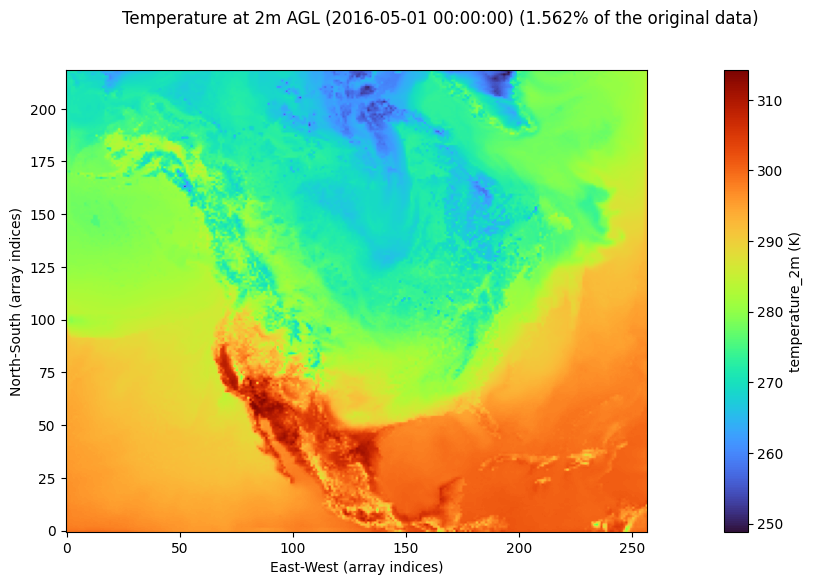

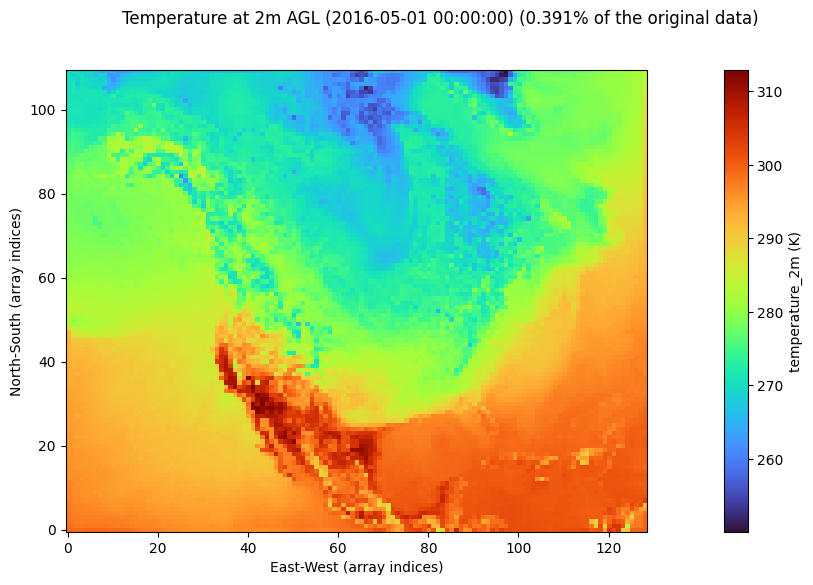

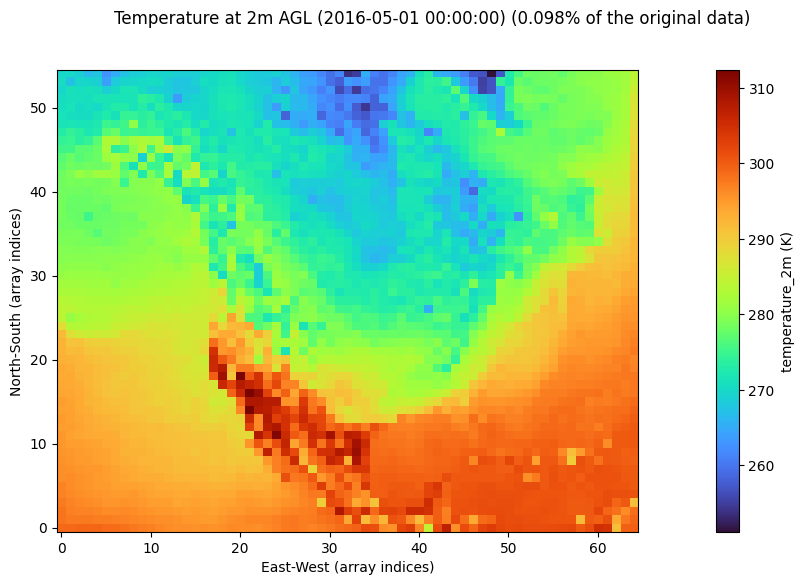

CPU times: user 3.62 s, sys: 221 ms, total: 3.84 s
Wall time: 1.42 s


In [4]:
%%time

for quality in (0, -2, -4, -6, -8, -10):
    title = f'{field_name} ({date}) ({"{:.3%}".format(1.0 / (2 ** (-1 * quality)))} of the original data)'
    data = anl.get_field(date, field, quality)
    
    fig = plt.figure(figsize=(10, 6))
    axes = plt.axes()
    plot = axes.imshow(data, aspect='auto', origin='lower', cmap=colormap)
    axes.set_xlabel('East-West (array indices)')
    axes.set_ylabel('North-South (array indices)')
    fig.suptitle(title)
    fig.colorbar(plot, location='right', pad=0.05, label=f'{field} ({field_units})')
    
    plt.show()

## Example: Plotting the data as a scatter plot

#### Defining a function to calculate the extents of the longitude and latitude

In [5]:
def get_extent(date: str):
    longitudes = anl.get_field(date, 'longitude')
    latitudes = anl.get_field(date, 'latitude')

    min_lon = np.min(longitudes)
    longitudes_b = np.where(longitudes < 0, longitudes, min_lon)

    return [np.min(longitudes_b),np.max(longitudes_b), np.min(latitudes), np.max(latitudes)]

#### Plotting the data with the scatter function

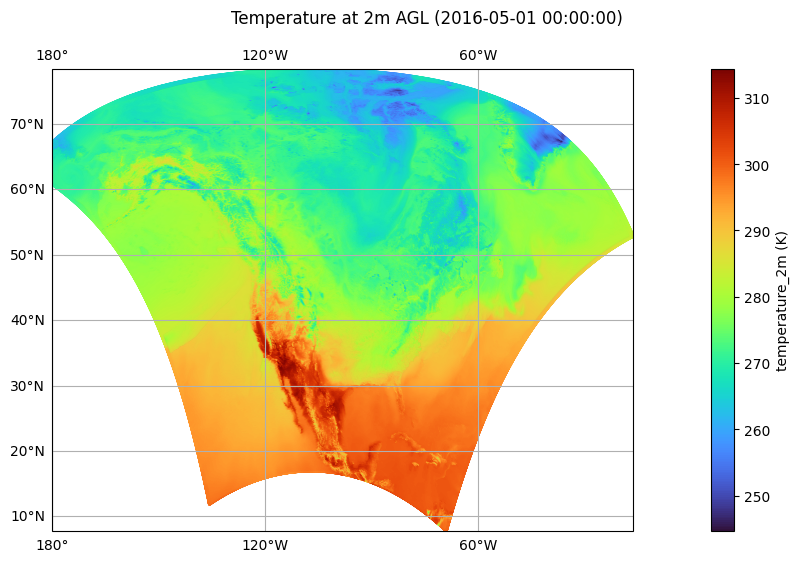

CPU times: user 18.3 s, sys: 383 ms, total: 18.7 s
Wall time: 18.1 s


In [7]:
%%time

title = f'{field_name} ({date})'
data = anl.get_field(date, field)
longitudes = anl.get_field(date, 'longitude')
latitudes = anl.get_field(date, 'latitude')
extent = get_extent(date)

fig = plt.figure(figsize=(10, 6))
axes = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plot = axes.scatter(longitudes, latitudes, c=data, cmap=colormap, s=1, transform=ccrs.PlateCarree())
axes.coastlines()
axes.set_aspect('auto', adjustable='datalim')
axes.set_extent(extent, crs=ccrs.PlateCarree())
axes.gridlines(draw_labels=True)
fig.suptitle(title)
fig.colorbar(plot, location='right', pad=0.1, label=f'{field} ({field_units})')

plt.show()